# 회귀 모델
* 소득이 증가하면 소비도 증가. 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있다고 할 수 있음.
* 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을 Simple Linear Regression이라고 함. 지도학습
* 변수 X와 Y에 대한 정보를 가지고 일차 방정식의 계수 a, b를 찾는 과정이 단순회귀분석 알고리즘


## 회귀 평가 지표
* MAE: 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것
<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FA0vg2%2FbtqKJ21prg3%2FqW1DU9ABDuAa7FYhialdtK%2Fimg.jpg' width = '400px'>

* MSE: 실제값과 예측값의 차이를 제곱해 평균한 것
<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fbcc0Uc%2FbtqKRtpDJao%2FhMAy23iipYRCXkEhZXjDVk%2Fimg.png' width = '400px'>

* RMSE: MSE에 루트를 씌운 것(실제 오류 평균보다 커지는 것 보정)
<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbU39A9%2FbtqKIpPZ50F%2Fs4OhjS93HwDIPbiMTJC7tk%2Fimg.png' width = '200px'>

* R square: 분산 기반으로 예측 성능을 평가. 실제값의 분산 대비 예측값의 분산 비율을 지표로 함.



참고:
https://blog.naver.com/PostView.nhn?blogId=bya135&logNo=222228358219&parentCategoryNo=&categoryNo=24&viewDate=&isShowPopularPosts=true&from=search<br>
https://libertegrace.tistory.com/entry/Evaluation2


## AUTO-MPG 파일로 실습

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 데이터 전처리

In [41]:
# 데이터 불러오기

df = pd.read_excel('auto-mpg.xlsx', engine = 'openpyxl')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [42]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [43]:
# 필요데이터셋 세팅

ndf = df[['mpg', 'cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [44]:
# 데이터 탐색

ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         398 non-null    float64
 1   cylinders   398 non-null    int64  
 2   horsepower  398 non-null    object 
 3   weight      398 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 12.6+ KB


In [45]:
# horsepower 데이터셋 전처리하기
ndf.horsepower.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [46]:
# '?' 값을 null값으로 바꾸고 null값 삭제

ndf['horsepower'] = ndf['horsepower'].replace('?', np.nan)
# ndf['horsepower'] = ndf['horsepower'].replace(np.nan, ndf['horsepower'].mean())
ndf.dropna(subset = ['horsepower'], axis = 0, inplace = True)

In [47]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


In [48]:
# pickle파일로 저장

ndf.to_pickle('auto-mpg.pkl')
ndf = pd.read_pickle('auto-mpg.pkl')
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


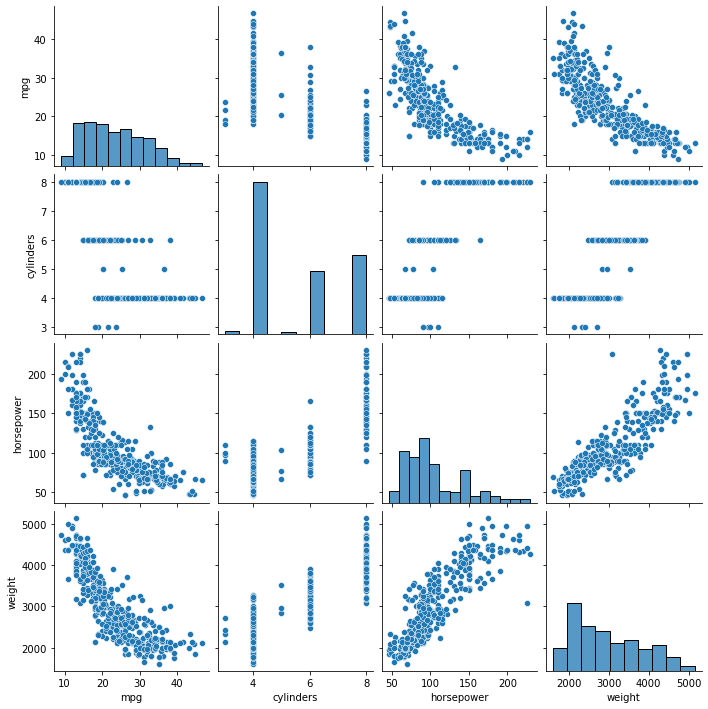

In [51]:
# 각 변수의 상관관계 확인하기
sns.pairplot(ndf)

### 단순선형회귀분석

In [142]:
# weight, mpg 변수를 활용해서 단순선형회귀모델 만들기

x = ndf[['weight']] # 독립변수
y = ndf[['mpg']]  # 종속변수

#### 회귀직선 + 산점도 시각화

<AxesSubplot:title={'center':'Regression Plot'}, xlabel='weight', ylabel='mpg'>

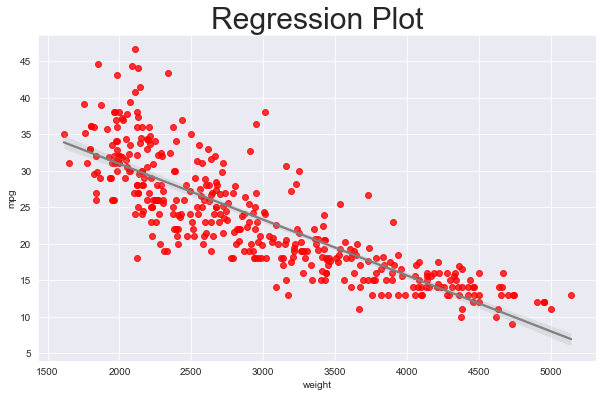

In [143]:
sns.set_style('darkgrid')

fig, axes = plt.subplots(1,1, figsize = (10,6))
plt.title('Regression Plot', fontsize = 30)

sns.regplot(ax = axes, x = 'weight', y = 'mpg', data = ndf,
           scatter_kws = {'color': 'red'}, line_kws = {'color': 'gray'})

#### 데이터셋 모델링

In [144]:
# 학습용/테스트용 데이터셋 나누기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3,
                                                    random_state = 11)

# 데이터셋 개수 확인
print(len(X_train), len(X_test))

274 118


In [145]:
# 단순선형회귀모델 객체화 
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)

#### 모델링 평가: MSE, RMSE, R_Squared

In [146]:
from sklearn.metrics import mean_squared_error, r2_score


# 평가: 평균오차제곱값, 평균오차값 , R_squared값 구하기

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

r2_score = r2_score(y_test, y_preds)
r_square2 = lr.score(X_test, y_test)

print(f'MSE: {mse: .2f}, RMSE: {rmse: .2f}, R-squared: {r2_score: .3f}')

MSE:  22.17, RMSE:  4.71, R-squared:  0.641


#### 회귀계수 구하기: 기울기, 절편

In [147]:
## 기울기
print(lr.coef_)


## 절편
print(lr.intercept_)

[[-0.00762163]]
[45.9712177]


- 기울기가 굉장히 작은 이유는 x, y 값의 스케일 차이가 크기 때문임

#### y, y예측값(y_hat) 시각화

<AxesSubplot:ylabel='Density'>

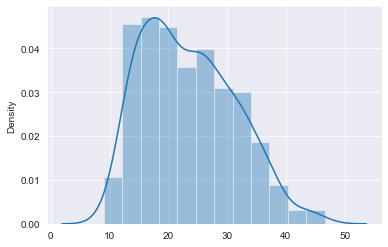

In [148]:
# 실제 y값 시각화

sns.distplot(y)

<AxesSubplot:ylabel='Density'>

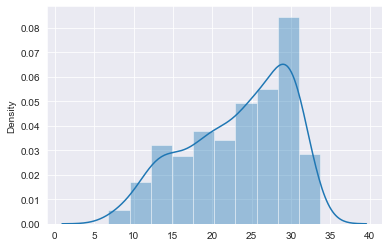

In [149]:
# 예측 y값 시각화

y_hat = lr.predict(x)

sns.distplot(y_hat)

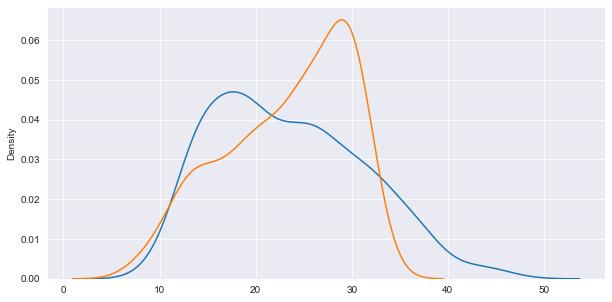

In [84]:
# 실제값, 예측값 동시 시각화

plt.figure(figsize = (10,5))

ax1 = sns.distplot(y, hist = False, label = 'y', )
ax2 = sns.distplot(y_hat, hist = False, label = 'y_hat')

- 실제값은 왼쪽으로 편향, 예측값은 오른쪽으로 편향되어 있음
- 따라서, 모형의 오차를 줄일 필요가 있음

### 다항회귀분석
* 직선보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선 형태의 회귀선을 표현할 수 있음
* 2차 함수 이상의 다항 함수를 이용하여 두 변수 간의 선형관계를 설명하는 알고리즘
* 다항 회귀도 선형회귀임. 
    - <b>선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며</b> 독립변수의 선형/비선형 여부와는 무관<br>
    
참고:
https://chana.tistory.com/entry/%ED%95%B8%EC%A6%88%EC%98%A8-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D5-%EB%8B%A4%ED%95%AD-%ED%9A%8C%EA%B7%80


In [168]:
# 데이터불러오기

ndf = pd.read_pickle('auto-mpg.pkl')
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


#### 모델링: 다항식 변환

In [169]:
x = ndf[['weight']] # 독립변수
y = ndf[['mpg']]  # 종속변수

# 학습용/테스트용 데이터셋 나누기

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3,
                                                    random_state = 11)

# 데이터셋 개수 확인
print(len(X_train), len(X_test))

274 118


In [170]:
# PolynomialFeatures: 다항식 변환 클래스
from sklearn.preprocessing import PolynomialFeatures


# 학습용 x_train 데이터를 2차 다항회귀식으로 변환 (y = b0 + b1x + b2x^2)
poly = PolynomialFeatures(degree = 2)

X_train_poly = poly.fit_transform(X_train)


print(X_train.shape, X_train_poly.shape, '\n')

print(poly.get_feature_names(), '\n')

print(X_train[:3], '\n', X_train_poly[:3])

# 다항회귀 모델링
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

(274, 1) (274, 3) 

['1', 'x0', 'x0^2'] 

     weight
311    2120
106    4499
332    1845 
 [[1.0000000e+00 2.1200000e+03 4.4944000e+06]
 [1.0000000e+00 4.4990000e+03 2.0241001e+07]
 [1.0000000e+00 1.8450000e+03 3.4040250e+06]]


LinearRegression()

#### 모델링 평가: R_Squared

In [176]:
y_preds

array([[29.27985295],
       [25.65957977],
       [27.90795996],
       [24.97363328],
       [15.02740907],
       [16.26973439],
       [14.22713816],
       [25.60622838],
       [31.37580058],
       [25.24039025],
       [29.77525875],
       [16.47551834],
       [12.13119053],
       [30.34688083],
       [18.19038459],
       [30.23255642],
       [27.83174368],
       [21.96309032],
       [10.62210824],
       [27.64120299],
       [24.7068763 ],
       [17.18432972],
       [27.8927167 ],
       [21.33049522],
       [10.15718895],
       [29.18839342],
       [27.71741926],
       [29.05882575],
       [18.38092528],
       [20.36254849],
       [31.20812477],
       [17.58065437],
       [ 7.88594388],
       [31.20812477],
       [14.8978414 ],
       [26.15498558],
       [14.41005723],
       [23.525524  ],
       [29.42466388],
       [24.63066003],
       [29.00547435],
       [21.9021173 ],
       [30.33925921],
       [30.8041785 ],
       [26.04066116],
       [29

In [182]:
# 테스트용 x_test 데이터를 2차 다항회귀식으로 변환
X_test_poly = poly.fit_transform(X_test)


# 평가: R_squared
r_square2 = pr.score(X_test_poly, y_test)


print(f'R_squared: {r_square: .3f},{r_square2: .3f}')

R_squared:  0.637, 0.637


- 설계한 모형의 오차가 작으면, r_square은 커지고, 모델 설명력은 커짐
- 반대로 모형의 오차가 크면, r_square은 작아지고, 모델 설명력은 작아짐

In [158]:
# 회귀계수
print(pr.coef_)

# 절편
print(pr.intercept_)

[[ 0.00000000e+00 -2.06207232e-02  2.03618732e-06]]
[65.12274143]


#### 다항 회귀 시각화

Text(0, 0.5, 'MPG')

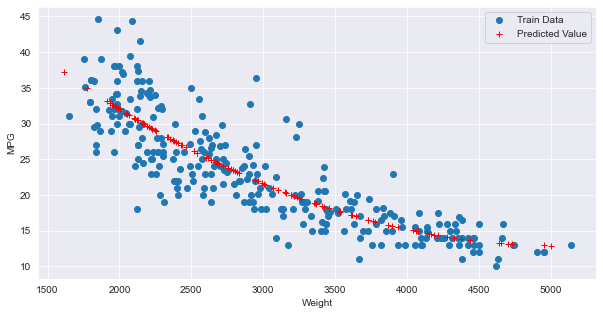

In [160]:
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)


# 데이터분포
ax.plot(X_train.values[:,:], y_train.values[:,:], 'o', label='Train Data') 



# 예측데이터 분포
ax.plot(X_test.values[:,:], y_hat_test, 'r+', label='Predicted Value')


plt.legend(loc = 'best')

plt.xlabel('Weight')
plt.ylabel('MPG')

### 다중회귀분석
* 여러 개의 독립 변수가 종속 변수에 영향을 주고 선형 관계를 갖는 경우에 다중회귀분석을 사용
* 다중 회귀분석 알고리즘은 각 독립 변수의 계수와 상수항에 적절한 값들을 찾아서 모형을 완성. 지도학습


In [106]:
ndf = pd.read_pickle('auto-mpg.pkl')
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


#### 모델링

In [107]:
x = ndf.drop(['mpg'], axis = 1)
y = ndf.mpg

In [118]:
# 학습용/테스트용 데이터셋 분리

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)
print(len(X_train), len(X_test))

# 회귀모델링
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)

274 118


#### 모델링 평가: MSE, RMSE, R_Squared

In [119]:
# 평균오차제곱, 평균오차, R_squared 값 구하기
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

R_squred = lr.score(X_test, y_test)


print(f'MSE: {mse: .3f}, RMSE: {rmse: .3f}, R_squred: {R_squred:.3f}')

MSE:  17.330, RMSE:  4.163, R_squred: 0.694


#### 다중회귀계수 구하기: 기울기, 절편

In [117]:
# 기울기
print(lr.coef_)

# 절편
print(lr.intercept_)

[-0.60691288 -0.03714088 -0.00522268]
46.41435126963405


#### 과제2. 보스턴 주택가격 모델링, 평가

아래 boston 데이터셋으로 보스턴 주택가격 예측모델을 만들고 평가하기

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

In [6]:
# 보스톤 데이터셋 로드
boston = load_boston()

# 보스톤 데이터셋 데이터프레임화
print(boston.keys())
bdf = pd.DataFrame(boston.data, columns = boston.feature_names)
bdf.head()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
# 보스톤 데이터셋의 종속변수는 price이므로 컬럼 추가해줌
print(boston.target[:5])
bdf['PRICE'] = boston.target
bdf.head()

[24.  21.6 34.7 33.4 36.2]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
# null값 및 데이터 개수 확인

bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [14]:
bdf.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

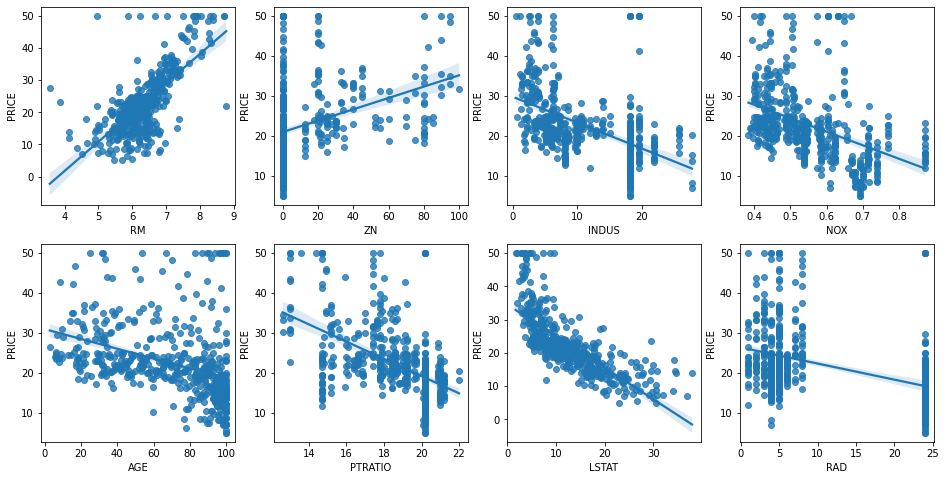

In [16]:
# 각 컬럼들이 회귀 결과에 미치는 영향 확인하기 위해 regplot 시각화

fig, axs = plt.subplots(figsize = (16,8), ncols = 4, nrows = 2)

# 방 개수, 일정 피트 초과 거주지역 비율, 비상업지역 넓이 비율, 일산화질소 농도, 
# 1940년 전 건축된 소유 주택 비율, 교사/학생 비율, 하위 계층 비율, 고속도로 접근 용이도
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

for i, feature in enumerate(lm_features):
    row = int(i//4)
    col = int(i%4)
    
    # 사본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x = feature, y = 'PRICE', data = bdf, ax = axs[row][col])

RM(방 개수), LSTAT(하위 계층 비율)의 관계성, 영향이 가장 두드러지게 나타남<br>
    -> 방의 크기가 클수록 가격 증가<br>
    -> 하위 계층 비율이 클수록 가격 감소<br>

In [44]:
# 선형회귀모델링

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = bdf.drop(['PRICE'], axis = 1)
y = bdf['PRICE']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 156)

# 선형회귀 OLS로 학습, 예측, 평가 수행
## 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

## 예측
y_preds = lr.predict(X_test)

## 평가
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
rsquared = r2_score(y_test, y_preds)
rsquared2 = lr.score(X_test, y_test)

print(f'MSE(평균오차제곱):{mse: .3f}, RMSE: {rmse: .3f}')
print(f'Variance score(R2squared): {rsquared: .3f}, {rsquared2: .3f}')

MSE(평균오차제곱): 17.297, RMSE:  4.159
Variance score(R2squared):  0.757,  0.757


d

In [25]:
# 기울기, 절편 구하기

## 기울기
print('기울기: ',lr.coef_)

## 절편
print(f'절편 값: {lr.intercept_:.3f}')

기울기:  [-1.12979614e-01  6.55124002e-02  3.44366694e-02  3.04589777e+00
 -1.97958320e+01  3.35496880e+00  5.93713290e-03 -1.74185354e+00
  3.55884364e-01 -1.42954516e-02 -9.20180066e-01  1.03966156e-02
 -5.66182106e-01]
절편 값: 40.996


In [31]:
# 회귀계수 및 컬럼명 정렬 매핑

coeff = pd.Series(data = np.round(lr.coef_, 1), index = x.columns)
coeff.sort_values(ascending = False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

RM이 회귀계수 값이 가장 크게 나옴

In [45]:
from sklearn.model_selection import cross_val_score

x = bdf.drop(['PRICE'], axis = 1)
y = bdf['PRICE']
lr = LinearRegression()

# 교차 검증: 모델, x, y, fold수 넣으면 각 폴드마다 정확도를 알려줌
## scoring: 클수록 좋은 함수를 기대하기 때문에 -mse를 쓰고 나서 나중에 다시 -를 곱해줌
## cv: 폴드 개수 지정
neg_mse_scores = cross_val_score(lr, x, y, scoring = 'neg_mean_squared_error', cv = 5)
print(f'5Folds의 개별 Negative MSE Scores:{np.round(neg_mse_scores,2)}')

rmse_scores = np.sqrt(-1 * neg_mse_scores)
print(f'5Folds의 개별 RMSE Scores: {np.round(rmse_scores,2)}')

avg_rmse = np.mean(rmse_scores)
print(f'5Folds의 평균 RMSE: {avg_rmse: .3f}')

5Folds의 개별 Negative MSE Scores:[-12.46 -26.05 -33.07 -80.76 -33.31]
5Folds의 개별 RMSE Scores: [3.53 5.1  5.75 8.99 5.77]
5Folds의 평균 RMSE:  5.829
